# Fischer's Linear Discriminant Analysis
##Learning Task 1

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
import math
import numpy as np

In [2]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Dsata Set for Assignment 1 copy.csv to Dsata Set for Assignment 1 copy.csv


In [3]:
import pandas as pd
import io
 
df = pd.read_csv(io.BytesIO(uploaded['Dsata Set for Assignment 1 copy.csv']))

In [4]:
df


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
for i, col in enumerate(df.columns):
    # Check if the current column is not the second column (index 1)
    if i !=1:
        # Calculate the average of the remaining values
        avg = df[col].mean()
        # Fill in the missing values with the average
        df[col].fillna(avg, inplace=True)

In [6]:
def z_score(data):
    # copy the dataframe
    data_std = data.copy()
    # apply the z-score method
    for column in data.loc[:, ~data.columns.isin(['id', 'diagnosis'])]:
        data_std[column] = (data_std[column] - data_std[column].mean()) / data_std[column].std()
        
    return data_std
    
# call the z_score function
df_norm = z_score(df)

In [7]:
df_norm


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
1,842517,M,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
2,84300903,M,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
3,84348301,M,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
4,84358402,M,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,...,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963,-0.708467
565,926682,M,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,...,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387,-0.973122
566,926954,M,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,...,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578,-0.318129
567,927241,M,1.845172,2.334403,1.981372,1.733693,1.524426,3.269267,3.294795,2.656528,...,1.959515,2.235958,2.301575,1.650790,1.429169,3.901415,3.195002,2.287972,1.917396,2.217684


In [8]:
X=df_norm[['radius_mean',
'texture_mean',
'perimeter_mean',
'area_mean',
'smoothness_mean',
'compactness_mean',
'concavity_mean',
'concave points_mean',
'symmetry_mean',
'fractal_dimension_mean',
'radius_se',
'texture_se',
'perimeter_se',
'area_se',
'smoothness_se',
'compactness_se',
'concavity_se',
'concave points_se',
'symmetry_se',
'fractal_dimension_se',
'radius_worst',
'texture_worst',
'perimeter_worst',
'area_worst',
'smoothness_worst',
'compactness_worst',
'concavity_worst',
'concave points_worst',
'symmetry_worst',
'fractal_dimension_worst']]
y=df_norm['diagnosis']

In [9]:
for i in range(569):
  if y[i]=="M":
    y[i]=0
  else:
    y[i]=1

<ipython-input-9-c4a69f25a118>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=0
<ipython-input-9-c4a69f25a118>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1


In [10]:
df_norm


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
1,842517,0,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
2,84300903,0,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
3,84348301,0,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
4,84358402,0,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,...,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963,-0.708467
565,926682,0,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,...,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387,-0.973122
566,926954,0,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,...,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578,-0.318129
567,927241,0,1.845172,2.334403,1.981372,1.733693,1.524426,3.269267,3.294795,2.656528,...,1.959515,2.235958,2.301575,1.650790,1.429169,3.901415,3.195002,2.287972,1.917396,2.217684


In [11]:
y.unique()

array([0, 1], dtype=object)

In [12]:
split_factor = 0.67

n_train = math.floor(split_factor * X.shape[0])

n_test = math.ceil(split_factor* X.shape[0])

X_train = X[:n_train]

y_train = y[:n_train].astype('int')

X_test = X[n_train:]

y_test = y[n_train:].astype('int')

print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 381
Total Number of rows in test: 188


In [13]:
clf=LDA(n_components=1) 
clf.fit(X_train,y_train)
X_Projected = clf.transform(X_test)
X_train_project = clf.fit_transform(X_train, y_train)
clf.score(X_train,y_train)

0.968503937007874

In [14]:
lda = LDA()
# Fit the model to the training data
lda.fit(X_train, y_train)
X_projected = lda.transform(X_train)

x1= X_projected[:, 0]

In [15]:
print(x1.shape)
print(type(x1))

(381,)
<class 'numpy.ndarray'>


Shape of X: (381, 30)
Shape of transformed X: (381, 1)


<ipython-input-16-8653d8f23f66>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y_train, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap('viridis', 2))


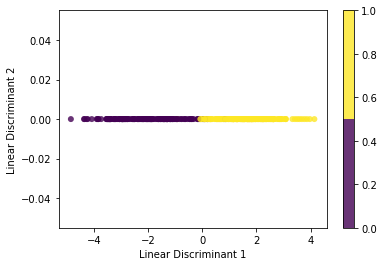

In [16]:
lda = LDA()
# Fit the model to the training data
lda.fit(X_train, y_train)
X_projected = lda.transform(X_train)

x1= X_projected[:, 0]
x2= np.zeros([len(x1),1])

print("Shape of X:", X_train.shape)
print("Shape of transformed X:", X_projected.shape)

plt.scatter(x1, x2, c=y_train, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap('viridis', 2))

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

<ipython-input-17-6ceb58dafdc3>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', 2))


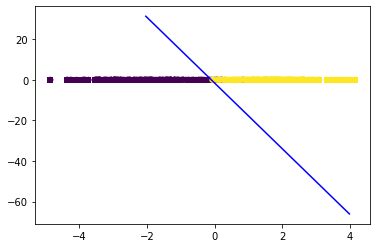

In [17]:
lda = LDA()
lda_object = lda.fit(X_train, y_train)
X_projected = lda.transform(X_train)

x1= X_projected[:, 0]
x2= np.zeros([len(x1),1])


for l,c,m in zip(np.unique(y),['r','g'],['s','o']):
    plt.scatter(x1,
                x2,
                alpha=1,
                c=y_train, marker=m, label=l,edgecolors='none',
                cmap=plt.cm.get_cmap('viridis', 2))
    

X1 = np.array([np.min(X.iloc[:, 0], axis=0), np.max(X.iloc[:, 0], axis=0)])

for i, c in enumerate(['b']):
    b, w1= lda.intercept_[i], lda.coef_[i][0]
    y1 = -(b+X1*w1)    
    plt.plot(X1,y1,c)




## Learning Task 2

In [18]:
df_random=df_norm.sample(frac=1, axis=1).reset_index(drop=True)

In [19]:
df_random

,texture_worst,perimeter_worst,compactness_se,radius_worst,fractal_dimension_se,area_mean,concave points_mean,perimeter_mean,smoothness_mean,texture_mean,...,compactness_worst,area_worst,concavity_worst,area_se,fractal_dimension_mean,texture_se,concave points_worst,radius_se,concave points_se,perimeter_se
0,-1.358098,2.301575,1.316568,1.885031,0.906286,0.983510,2.530249,1.268389,1.567087,-2.071512,...,2.614365,1.998658,2.107374,2.485391,2.253764,-0.564768,2.294058,2.487545,0.660239,2.830540
1,-0.368879,1.533776,-0.691723,1.804340,-0.099356,1.907030,0.547662,1.684639,-0.826235,-0.353322,...,-0.430066,1.887973,-0.147968,0.741749,-0.867889,-0.875473,1.086129,0.498816,0.259933,0.263095
2,-0.023953,1.346291,0.815054,1.510541,0.293301,1.557513,2.035440,1.565122,0.941382,0.455786,...,1.081980,1.454016,0.853340,1.180298,-0.397658,-0.779398,1.953282,1.227596,1.423575,0.850180
3,0.133866,-0.249720,2.742924,-0.281217,2.045711,-0.763792,1.450431,-0.595257,3.280667,0.253509,...,3.889975,-0.551147,1.987485,-0.288125,4.906602,-0.110312,2.173873,0.326087,1.114027,0.286341
4,-1.465481,1.337363,-0.047796,1.297434,0.498889,1.824624,1.427237,1.775308,0.280125,-1.150804,...,-0.313119,1.218589,0.611645,1.189310,-0.561956,-0.789549,0.728618,1.269426,1.143199,1.272070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.117596,1.751022,0.192350,1.899514,0.167832,2.341795,2.318924,2.059677,1.040926,0.720838,...,-0.273077,2.012713,0.662958,2.601897,-0.930209,0.070963,1.627719,2.779634,2.065360,2.377491
565,2.045599,1.420690,-0.069018,1.535369,-0.490124,1.722326,1.262558,1.614577,0.102368,2.083301,...,-0.394473,1.492668,0.235195,1.290429,-1.057681,2.258951,0.733182,1.299356,0.807720,1.155840
566,1.373645,0.578492,0.661472,0.560868,0.036694,0.577445,0.105684,0.670803,-0.839745,2.043775,...,0.350427,0.426222,0.325352,0.180539,-0.894800,-0.257145,0.413705,0.184730,0.611619,0.276450
567,2.235958,2.301575,2.016901,1.959515,0.903262,1.733693,2.656528,1.981372,1.524426,2.334403,...,3.901415,1.650790,3.195002,1.008615,1.042778,0.685485,2.287972,1.156917,0.785031,1.437265


In [20]:
X=df_random[['radius_mean',
'texture_mean',
'perimeter_mean',
'area_mean',
'smoothness_mean',
'compactness_mean',
'concavity_mean',
'concave points_mean',
'symmetry_mean',
'fractal_dimension_mean',
'radius_se',
'texture_se',
'perimeter_se',
'area_se',
'smoothness_se',
'compactness_se',
'concavity_se',
'concave points_se',
'symmetry_se',
'fractal_dimension_se',
'radius_worst',
'texture_worst',
'perimeter_worst',
'area_worst',
'smoothness_worst',
'compactness_worst',
'concavity_worst',
'concave points_worst',
'symmetry_worst',
'fractal_dimension_worst']]
y=df_random['diagnosis']

In [21]:
split_factor = 0.67

n_train = math.floor(split_factor * X.shape[0])

n_test = math.ceil(split_factor* X.shape[0])

X_train = X[:n_train]

y_train = y[:n_train].astype('int')

X_test = X[n_train:]

y_test = y[n_train:].astype('int')

print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 284
Total Number of rows in test: 285


In [22]:
clf=LDA(n_components=1) 
clf.fit(X_train,y_train)
X_Projected = clf.transform(X_tr
X_train_project = clf.fit_transform(X_train, y_train)
clf.score(X_train,y_train)

0.9647887323943662

Shape of X: (284, 30)
Shape of transformed X: (284, 1)


<ipython-input-23-d5704500e179>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1, x2, c=y_train, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap('viridis', 2))


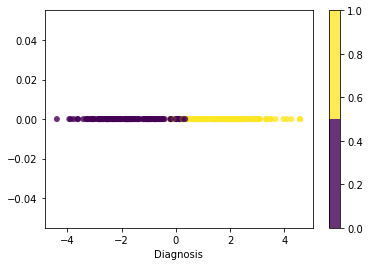

In [23]:
lda = LDA()
# Fit the model to the training data
lda.fit(X_train, y_train)
X_projected = lda.transform(X_train)

x1= X_projected[:, 0]
x2= np.zeros([len(x1),1])

print("Shape of X:", X_train.shape)
print("Shape of transformed X:", X_projected.shape)

plt.scatter(x1, x2, c=y_train, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap('viridis', 2))

plt.xlabel("Diagnosis")
plt.colorbar()
plt.show()

<ipython-input-24-6ceb58dafdc3>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', 2))


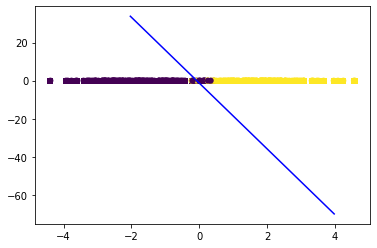

In [24]:
lda = LDA()
lda_object = lda.fit(X_train, y_train)
X_projected = lda.transform(X_train)

x1= X_projected[:, 0]
x2= np.zeros([len(x1),1])


for l,c,m in zip(np.unique(y),['r','g'],['s','o']):
    plt.scatter(x1,
                x2,
                alpha=1,
                c=y_train, marker=m, label=l,edgecolors='none',
                cmap=plt.cm.get_cmap('viridis', 2))
    

X1 = np.array([np.min(X.iloc[:, 0], axis=0), np.max(X.iloc[:, 0], axis=0)])

for i, c in enumerate(['b']):
    b, w1= lda.intercept_[i], lda.coef_[i][0]
    y1 = -(b+X1*w1)    
    plt.plot(X1,y1,c)




###The accuracy scores and decision boundary are relatively unchanged even after shuffling the order of the features randomly.